<a href="https://colab.research.google.com/github/CFVV/MSc-assignments/blob/main/2022-2_Computer_Audition/T2_Sinusoids_BeatlesSong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 2: Sinusoides
### Camila Vera Villa

#### Pregunta 7. Síntesis aditiva y Análisis en frecuencia: Reproduzca la línea melódica principal utilizando sinusoides y suba el resultado.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Magíster en Ciencias de la Ingeniería UC/2022-2_Audición_computador/Taller2: Sinusoides/"

In [ ]:
pip install pydub

In [ ]:
%matplotlib inline
from pylab import *
from IPython.html.widgets import interact, fixed
from IPython.display import display
from IPython.display import Audio
from scipy.signal import square
import re
import soundfile as sf
from scipy.io import wavfile
import wave
from pydub import AudioSegment

/usr/local/lib/python3.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


La función `genera_melodia` toma un string de notas separadas por comas y transforma cada una por separado a una representación de onda sinusoidal, finalmente, entrega un stack de arreglos de estas ondas:

In [ ]:
def genera_melodia(melody, sample_freq=10.e3, bpm=50):
    duration = re.compile("^[0-9]+") # extrae la duración exrpresada en cuartos, 8, 16 notas
    pitch = re.compile("[\D]+[\d]*") # extrae el pitch, usa la notación musical estandar: a,b,c,d,etc
    measure_duration = 4 * 60. / bpm #usualmente corresponde a 4/4
    output = zeros((0,))
    final_wave = [] #np.array([])

    for note in melody.split(','):
        # regexp matching
        duration_match = duration.findall(note)
        pitch_match = pitch.findall(note)
        if len(duration_match) == 0:
            t_max = 1/4. #tempo
        else:
            t_max = 1/float(duration_match[0])
        if "." in pitch_match[0]:
            t_max *= 1.5
            pitch_match[0] = "".join(pitch_match[0].split("."))
        t_max = t_max * measure_duration

        # Octave
        if pitch_match[0][-1] in ["1", "2", "3", "4", "5", "6", "7", "8"]: # octave is known
                octave = ["1", "2", "3", "4", "5", "6", "7", "8"].index(pitch_match[0][-1]) + 1
                height = pitch_match[0][:-1]
        else: # octave is not known
                octave = 5
                height = pitch_match[0]
        #cálculo de la frecuencia para generar los sonidos
        freq = 261.626 * 2 ** ((["c", "c#", "d", "d#", "e", "f", "f#", "g", "g#", "a", "a#", "b"].index(height) / 12. + octave - 4))
        # genera el sonido
        t = arange(0, t_max, 1/sample_freq)
        # genera la onda
        wave = np.sin(2 * pi * freq * t)
        # append to output
        output = hstack((output, wave))
        final_wave.append(wave)
    return final_wave
    display(Audio(output, rate=sample_freq))

### Beatles melody


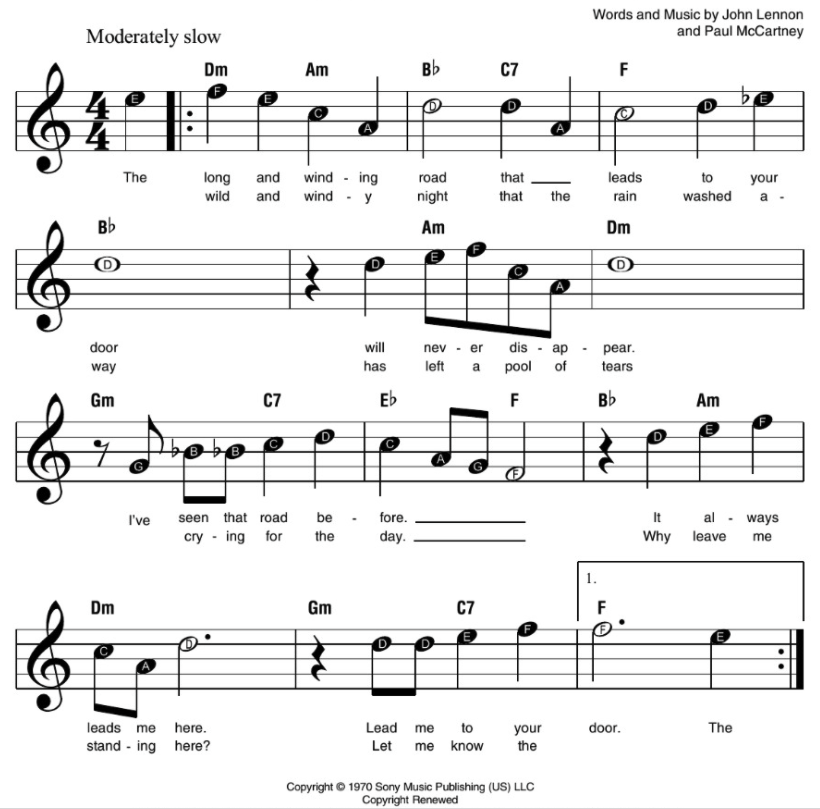

Melodía entregada

In [ ]:
file = wave.open(path + "Melody_Beatles.wav")

In [ ]:
display(Audio(path + "Melody_Beatles.wav", rate=44100))

In [ ]:
print("Número de canales:" , file.getnchannels())
print("Sampling frequency:" ,file.getframerate())
print("Sample width:" ,file.getsampwidth())
print("Frames:" ,file.getnframes())

Número de canales: 2
Sampling frequency: 44100
Sample width: 2
Frames: 667153


#### Extracción de línea melódica principal

Notas de la melodía:

In [ ]:
melodia = "4e4,4f4,4e4,4c4,4a3,2d4,5d4,4a3,2c4,4d4,4d#4,2d4"

In [ ]:
wave = genera_melodia(melodia, sample_freq=44100, bpm = 80)
wave = np.hstack(wave)

In [ ]:
display(Audio(wave, rate=44100))

In [ ]:
sf.write(path + 'linea_melodica_beatles_Camila.wav', wave, 44100)